**Import necessary libraries**

In [19]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import librosa
from scipy.ndimage import gaussian_filter1d
from scipy.signal import find_peaks

**Mount the Notebook with Google Drive, this is not necessary for local machine**

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Here is seven wav file in my drive names are : (1.wav,2.wav,3.wav,4.wav,5.wav,6.wav,7.wav)**

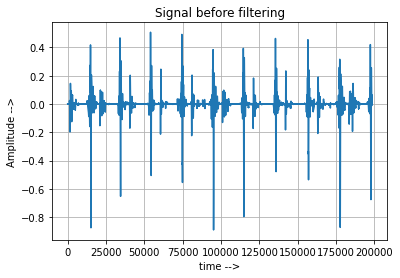

In [21]:
#Load any wav file using Librosa library
d,r = librosa.load(r'/content/drive/My Drive//test/4.wav')

#Plot the heart rate audio signal
plt.plot(d)
plt.grid("on")
plt.xlabel("time -->")
plt.ylabel("Amplitude -->")
plt.title("Signal before filtering");

***For remove noise use gaussian filter with sigma value 17***

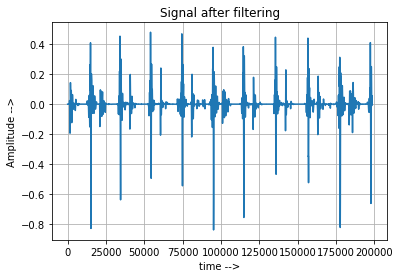

In [22]:
#filtering
blur = gaussian_filter1d(d, 17)

#Plot the Gaussian filtered signal
plt.plot(blur)
plt.grid("on")
plt.xlabel("time -->")
plt.ylabel("Amplitude -->")
plt.title("Signal after filtering");

**Find peaks using Scipy find peaks module**

*distance : Required minimal horizontal distance (>= 1) in samples between neighbouring peaks. Smaller peaks are removed first until the condition is fulfilled for all remaining peaks.*

---



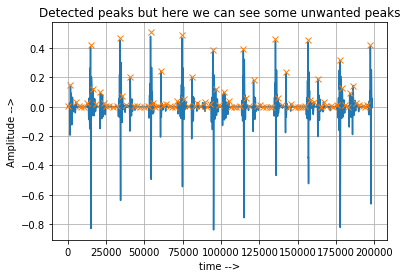

In [23]:
#find peaks.
peaks, _ = find_peaks(blur, distance=1500)

#Plot detected peaks
plt.plot(blur)
plt.plot(peaks, d[peaks], "x")
plt.xlabel("time -->")
plt.ylabel("Amplitude -->")
plt.grid("on")
plt.title("Detected peaks but here we can see some unwanted peaks");

Try to remove unwanted peaks.
Here I used two metods.
1. thresholding: set the threshold value maximum of signal value multiply with a factor 0.1

2. distance: I consider an original peak should be have maintain a distance 1500 from it's previous and next peak

In [24]:
thre = 0.1*np.max(d)
mypk = []
for i in range(peaks.shape[0]):
  if d[peaks[i]] > thre:
    mypk.append(peaks[i])

newpk = []
newpk.append(mypk[0])
for i in range(1,len(mypk)-1):
  if abs(mypk[i] - mypk[i-1]) > 1500 and abs(mypk[i] - mypk[i+1]) > 1500:
    newpk.append(mypk[i])

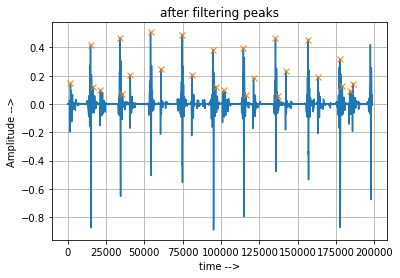

In [25]:
#Plotting signal after removing unwanted peaks
plt.plot(d)
plt.plot(newpk, d[newpk], "x")
plt.grid("on")
plt.xlabel("time -->")
plt.ylabel("Amplitude -->")
plt.title("after filtering peaks");

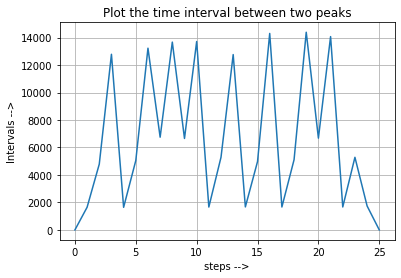

In [26]:
interval = []
interval.append(0)
for i in range(1,len(newpk)-1):
  interval.append(newpk[i+1] - newpk[i])
  
interval.append(0)

#Plot interval between two peaks to see any irregularity present or not
plt.plot(interval)
plt.grid("on")
plt.xlabel("steps -->")
plt.ylabel("Intervals -->")
plt.title("Plot the time interval between two peaks");